In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [136]:
from PIL import Image
from io import BytesIO
from numpy import asarray

filename = 'data_for_HoG.jpg'

# 画像ファイルパスから読み込み
img = Image.open(filename)
# グレースケール変換
gray_img = img.convert('L')

In [3]:
# numpy変換
numpydata = asarray(gray_img)

In [4]:
# 勾配行列の作成
gxmat = np.zeros(numpydata.shape)
gymat = np.zeros(numpydata.shape)
for i in range(numpydata.shape[0]):
    for j in range(numpydata.shape[1]):
        if j == 0:
            gxmat[i][j] = numpydata[i][j+1] - numpydata[i][j]
        elif j == numpydata.shape[1] - 1:
            gxmat[i][j] = numpydata[i][j] - numpydata[i][j-1]
        else:
            gxmat[i][j] = (numpydata[i][j+1] - numpydata[i][j])/2 + (numpydata[i][j] - numpydata[i][j-1])/2
for i in range(numpydata.shape[1]):
    for j in range(numpydata.shape[0]):
        if j == 0:
            gymat[j][i] = numpydata[j+1][i] - numpydata[j][i]
        elif j == numpydata.shape[0] - 1:
            gymat[j][i] = numpydata[j][i] - numpydata[j-1][i]
        else:
            gymat[j][i] = (numpydata[j+1][i] - numpydata[j][i])/2 + (numpydata[j][i] - numpydata[j-1][i])/2
print(gxmat)
print(gymat)

/var/folders/rt/pkbytcnn1hd9rls41zpsknlh0000gn/T/ipykernel_32493/2180243503.py:11: RuntimeWarning: overflow encountered in ubyte_scalars
  gxmat[i][j] = (numpydata[i][j+1] - numpydata[i][j])/2 + (numpydata[i][j] - numpydata[i][j-1])/2
/var/folders/rt/pkbytcnn1hd9rls41zpsknlh0000gn/T/ipykernel_32493/2180243503.py:7: RuntimeWarning: overflow encountered in ubyte_scalars
  gxmat[i][j] = numpydata[i][j+1] - numpydata[i][j]
/var/folders/rt/pkbytcnn1hd9rls41zpsknlh0000gn/T/ipykernel_32493/2180243503.py:9: RuntimeWarning: overflow encountered in ubyte_scalars
  gxmat[i][j] = numpydata[i][j] - numpydata[i][j-1]
/var/folders/rt/pkbytcnn1hd9rls41zpsknlh0000gn/T/ipykernel_32493/2180243503.py:19: RuntimeWarning: overflow encountered in ubyte_scalars
  gymat[j][i] = (numpydata[j+1][i] - numpydata[j][i])/2 + (numpydata[j][i] - numpydata[j-1][i])/2
/var/folders/rt/pkbytcnn1hd9rls41zpsknlh0000gn/T/ipykernel_32493/2180243503.py:15: RuntimeWarning: overflow encountered in ubyte_scalars
  gymat[j][i] = n

[[1.  1.5 2.  ... 0.  0.  0. ]
 [1.  1.5 2.  ... 0.  0.  0. ]
 [1.  1.5 2.  ... 0.  0.  0. ]
 ...
 [0.  0.  0.  ... 0.  0.  0. ]
 [0.  0.  0.  ... 0.  0.  0. ]
 [0.  0.  0.  ... 0.  0.  0. ]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [6]:
gradmat = np.arctan(gymat/(gxmat+0.000001))

In [7]:
gradmat = ((gradmat + 180)//20 * 20) % 180

In [12]:
gradpower = (np.sqrt(gxmat*gxmat) + np.sqrt(gymat*gymat))/4

In [49]:
gradhist = np.zeros(numpydata.shape)

In [101]:
gradhist = []

In [102]:
for i in range(gradmat.shape[0]//50):
    gradhistrow = []
    for j in range(gradmat.shape[1]//50):
        oriented_hist = np.zeros(9)
        gradmatcell = gradmat[i*50:i*50+50][:, j*50:j*50+50]
        gradpowercell = gradpower[i*50:i*50+50][:, j*50:j*50+50]
        for k in range(50):
            for l in range(50):
                oriented_hist[int(gradmatcell[k][l])] += gradpowercell[k][l]
        gradhistrow.append(list(oriented_hist))
    gradhist.append(gradhistrow)

In [103]:
gradhist = np.array(gradhist)

In [143]:
hog = []

In [144]:
for i in range(gradhist.shape[0]-1):
    hogrow = []
    for j in range(gradhist.shape[1]-1):
        gradhistblock = gradhist[i:i+2][:, j:j+2].flatten()
        k = sum([num**2 for num in gradhistblock])
        gradhistblock_norm = [num/(k+0.0000001) for num in gradhistblock]
        hogrow.append(gradhistblock_norm)
    hog.append(hogrow)

In [145]:
np.array(hog).shape

(39, 59, 36)

In [147]:
hog

[[[4.195222771817995e-05,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   4.5580866384245935e-06,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   7.992330287559563e-05,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   5.431173377619233e-06,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0],
  [0.00014376050327552506,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.00013729645186925143,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.00017129736226625063,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.00043554778375471575,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0],
  [1.5897540400024032e-06,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   2.0302296767921462e-05,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   5.043202787917229e-06,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
 

/var/folders/rt/pkbytcnn1hd9rls41zpsknlh0000gn/T/ipykernel_32493/4268009064.py:6: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fd, hog_image = hog(


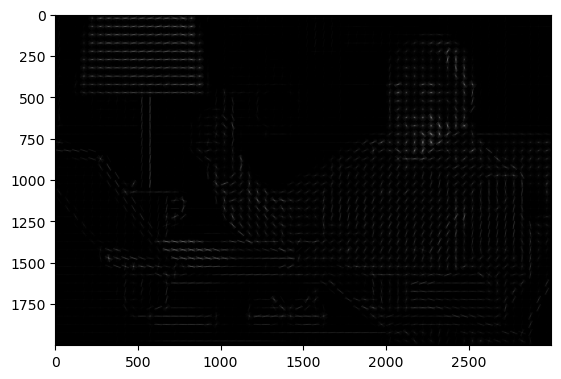

In [157]:
# 可視化
from skimage.feature import hog
from skimage import data, exposure

#hogとhog画像の取得
fd, hog_image = hog(
    img, orientations=9,
    pixels_per_cell=(50, 50),
    cells_per_block=(2, 2),
    visualize=True,
    multichannel=True,
    feature_vector=True
  )
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))
plt.imshow(hog_image_rescaled,cmap=plt.cm.gray)

In [158]:
fd.shape

(82836,)